<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 重點
  * 如何模擬這些分配的樣本點
  * 進行一些機率的運算，包含以下離散型分配        
    1. 離散均勻分配 ( Discrete Uniform Distribution )     
    2. 伯努利分配 ( Bernoulli Distribution )    
    3. 二項分配 ( Binomial Distribution )   

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

# 生活中的機率

* 範例：
  * 1000個商品不良品的個數
  * 大樂透會中頭獎的機率
  * 台灣男生的身高
* 隨機實驗 $\rightarrow$ 樣本空間 $\rightarrow X \rightarrow$ 實數 $\rightarrow f \rightarrow$ 機率分配

# 機率定義與性質

* 定義方式
  * 古典機率理論 (classical probability)
    * 說明：假設所有的試驗結果機率相同，若有測試結果 n 個，則分配之機率為 1/n
    * 範例：投擲硬幣
  * 客觀的機率理論 (objective probability)
    * 說明：又稱作為相對次數的機率理論，為長時間的重複隨機實驗中事件 E 所發生的機率，為出現該事件之次數與隨機實驗的總次數之比例
    * 範例：拋擲一顆均勻的 6 面的骰子每個數字應等機率出現，所以每次扔出骰子後，出現點數的期望值為 3.5，根據大數理論，隨著拋擲次數的增加，平均值 (樣本平均值) 應該接近 3.5，若對 n 個相互獨立的隨機變數的平均值，頻率越多則相對越精準
  * 主觀的機率理論 (subjective probability)
    * 事件發生機率取決於任對於發生此事件的信心程度，但主觀機率無客觀標準，因此主觀認知的爭議較大
    * 範例：買樂透自己選擇號碼的，必定是認為自己所選號碼更有信心中獎

* 機率分佈之兩種型態
  * 離散型：可能值為有限個或可數無限個，數值可列舉 (可數)
  * 連續型：可能值為一區間或數個區間內之任何值，數值無法列舉 (不可數)

* 名詞
  * 隨機實驗 (Random Experiment)：每次實驗結果都具有不確定性，透過實驗能發現某種規律性
  * 樣本空間 (Sample Space；S)：一項試驗中所有可能發生結果所形成的集合，如：S={1,2,3,4,5,6}
  * 樣本點 (Sample)：樣本空間的每一元素稱為一個樣本點，如：1或4
  * 事件 (Event)：樣本空間中每一部分集合(含空集合)均為此一樣本空間之一事件(即每一可能發生的結果)，如：數值小於2
  * 試驗 (Trial)：一個隨機實驗的執行一次，如：一次骰子，就是一次實驗
  * 隨機變數 (Random Variable)：為了將樣本空間轉換成實數，方便數值運算

# 離散型分配

## 離散均勻分配 (Discrete Uniform Distribution)

* 說明：有限個數值擁有相同的機率
* 函數：<br>
  * $ f(x) = P(X=x) = \frac{1}{N} , x = 1,2,...,N $
  * $ X \sim DU(1, N) $
* 生活實例
  * 投擲骰子或銅板
  * 圓周率小數點後的數值
* 語法

| 離散均勻分配 | 語法(scipy.stats) |
|-------------|:-------------:|
| 機率質量函數 | randint.pmf |
| 累積機率函數 | randint.cdf |
| 樣本點 | randint.rvs |
| 統計量計算 | randint.stats |


In [2]:
from scipy.stats import randint

1. 定義離散均勻分配的基本資訊

In [4]:
low, high = 7, 31
mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')
r = np.arange(low, high)
print(r)
print('='*20)
x = np.arange(randint.ppf(0.01, low, high),
              randint.ppf(0.99, low, high))
print(x)

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.
 25. 26. 27. 28. 29.]


2. 計算離散均勻分配的概率質量分佈 (probability mass function) 之所以稱為質量，是因為離散的點產生 x 軸的點

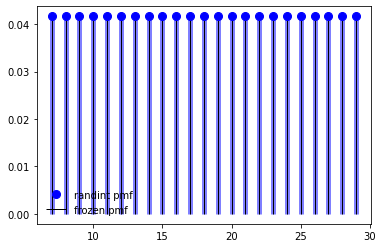

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, randint.pmf(x, low, high), 'bo', ms=8, label='randint pmf')
ax.vlines(x, 0, randint.pmf(x, low, high), colors='b', lw=5, alpha=0.5)

rv = randint(low, high)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
          label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [6]:
# P(X=x) --> 是機率
probs = stats.randint.pmf(r, low, high)
print(probs)

[0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]


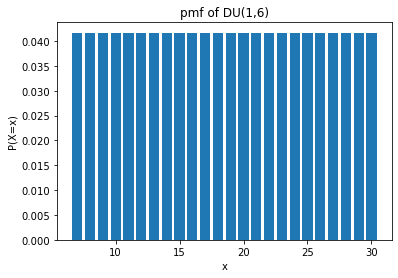

In [7]:
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of DU(1,6)')
plt.show()

3. 計算離散均勻分配的累積機率 (cumulative density function)，pmf 的累加

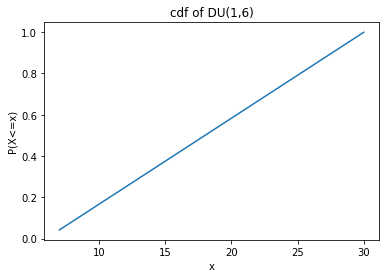

In [8]:
# P(X=x) --> 是機率
cumsum_probs = stats.randint.cdf(r, low,high)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('cdf of DU(1,6)')
plt.plot(r, cumsum_probs)
plt.show()

4. 透過 cdf，給定一個機率值，反推出對應到的 x

In [9]:
k = stats.randint.ppf(cumsum_probs, low, high)
print(k)
#看上圖看結果

[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.
 25. 26. 27. 28. 29. 30.]


5. 產生符合隨機樣本點 (random sample)

[22  9  8 19 17 23 28 20 26 18 29 29 12 16 21 27 26 16 17 18]


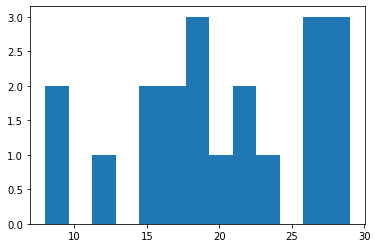

In [10]:
X = stats.randint.rvs(low, high, size=20)
print(X)
plt.hist(X, bins=13)
plt.show()
#試試看，，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [11]:
stat_randint=stats.randint.stats(low, high, moments='mvks')
print(stat_randint)
print(type(stat_randint))
print('randint mean=', float(stat_randint[0]))
print('randint variance=', float(stat_randint[1]))
print('randint kurtosis=', float(stat_randint[2]))
print('randint skew=', float(stat_randint[3]))

(array(18.5), array(47.91666667), array(0.), array(-1.20417391))
<class 'tuple'>
randint mean= 18.5
randint variance= 47.916666666666664
randint kurtosis= 0.0
randint skew= -1.2041739130434783


## 伯努利分配 (Bernoulli Distribution)

* 說明：只有兩種可能結果 (成功或失敗) 的單次隨機試驗，且成功的機率為 p (固定)，則稱為試驗為「伯努利試驗 (Bernoulli trial)」
* 函數：<br>
  * $ f_X(x) = p^x(1-p)^{(1-x)} , x = 0,1 $
  <br>
* 性質：
  * $ P(X=1) = p $
  * $ P(X=0) = 1-p = q $
  * $ X \sim bernoulli(p) $
  * $ \mu = E(X) = p $
  * $ \sigma^2 = Var(X) = p(1-p) $
* 語法

| 伯努利分配 | 語法(scipy.stats) |
|-------------|:-------------:|
| 機率質量函數 | bernoulli.pmf |
| 累積機率函數 | bernoulli.cdf |
| 樣本點 | bernoulli.rvs |
| 統計量計算 | bernoulli.stats |


In [12]:
from scipy.stats import bernoulli

1. 定義伯努利分配基本資訊

In [13]:
p = 0.4 # 事件A 機率 0.4
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
r = np.arange(0,2) # 可以出現的範圍為 0、1、2種可能出現的結果
print(r)
print('='*20)
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
print(x)

[0 1]
[0.]


2. 計算二項分佈的概率質量分佈 (probability mass function) 之所以稱為質量，是因為離散的點 

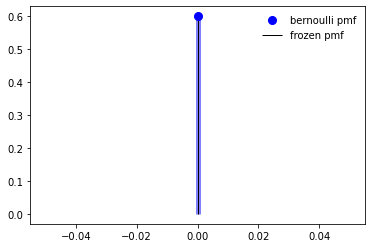

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

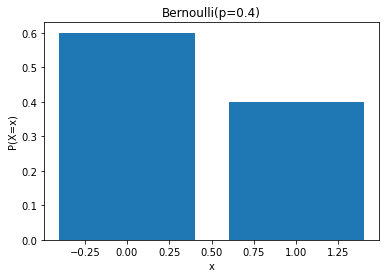

In [15]:
# P(X=x) --> 是機率
probs = stats.bernoulli.pmf(r,p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('Bernoulli(p=0.4)')
plt.show()

3. 計算伯努利分配的累積機率 (cumulative density function)，pmf 的累加 

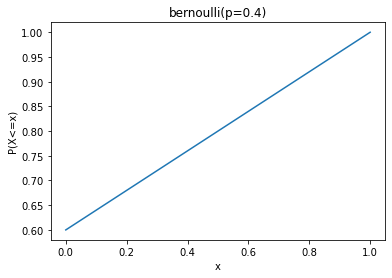

In [16]:
# P(X=x) --> 是機率
cumsum_probs = stats.bernoulli.cdf(r,p)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('bernoulli(p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [17]:
p_loc = stats.bernoulli.ppf(cumsum_probs, p)
print(p_loc)
#看上圖看結果

[0. 1.]


5. 產生符合伯努利分配的隨機樣本點 (random sample)

[0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1]


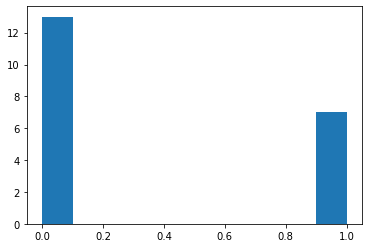

In [18]:
X = stats.bernoulli.rvs(p,size=20)
print(X)
plt.hist(X)
plt.show()
#試試看，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [19]:
stat_ber=stats.bernoulli.stats(p,moments='mvks')
print(stat_ber)
print(type(stat_ber))
#E(X)
print('bernoulli mean=', float(stat_ber[0]))
print('bernoulli variance=', float(stat_ber[1]))
print('bernoulli kurtosis=', float(stat_ber[2]))
print('bernoulli skew=', float(stat_ber[3]))

(array(0.4), array(0.24), array(0.40824829), array(-1.83333333))
<class 'tuple'>
bernoulli mean= 0.4
bernoulli variance= 0.24
bernoulli kurtosis= 0.40824829046386296
bernoulli skew= -1.8333333333333337


## 二項分配 (Binomial Distribution)

* 進行多次相同伯努利試驗，且試驗結果互相獨立，結果只有 2 種結果，稱為二項分配 (Binomial Experiment)
* 隨機一次試驗出現事件 A 的機率如果為 p，那麼在重複 n 次試驗中出現 x 次事件 A 的機率為：<br>
  $ f(n,x,p) = C_x^n * p^x * (1-p)^(n-x) , x = 0,...,n $
  $ C_x^n =  \left( \begin{array}{c} x \\ y \end{array} \right)
  = \frac{n!}{k!(n-k)!} $
* 語法

| 二項分配 | 語法(scipy.stats) |
|-------------|:-------------:|
| 機率質量函數 | binom.pmf |
| 累積機率函數 | binom.cdf |
| 樣本點 | binom.rvs |
| 統計量計算 | binom.stats |


In [22]:
from scipy.stats import binom

1. 定義二項分佈的基本資訊

In [23]:
p = 0.4 # 事件 A 機率 0.4
n = 5   # 重複實驗 5 次
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
print(r)
print('='*20)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
print(x)

[0 1 2 3 4 5]
[0. 1. 2. 3. 4.]


2. 計算二項分佈的概率質量分佈 (probability mass function) 之所以稱為質量，是因為離散的點 

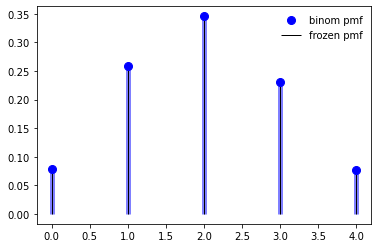

In [24]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

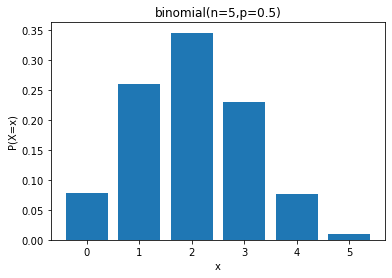

In [25]:
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

3. 計算二項分佈的累積機率 (cumulative density function)，pmf 的累加之所以稱為質量，是因為離散的點，預設體積 (即寬度) 為 1

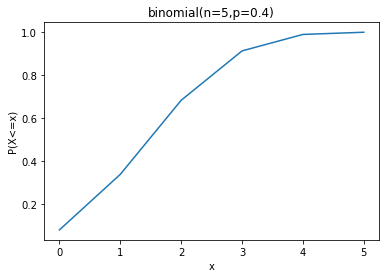

In [26]:
# P(X=x) --> 是機率
cumsum_probs = stats.binom.cdf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [27]:
p_loc= stats.binom.ppf(cumsum_probs, n, p)
print(p_loc)
#看上圖看結果

[0. 1. 2. 3. 4. 5.]


5. 產生符合二項分佈的隨機樣本點 (random sample)

[0 2 3 3 1 0 2 2 2 3 3 2 0 2 2 1 1 2 2 3]


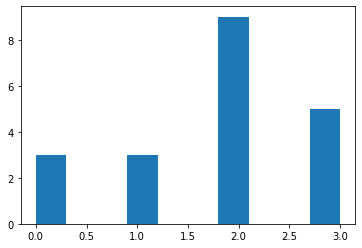

In [28]:
X = stats.binom.rvs(n,p,size=20)
#array([2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 2, 3, 4, 0, 3])
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。

In [29]:
stat_bin=stats.binom.stats(n,p,moments='mvks')
print(stat_bin)
print(type(stat_bin))
#E(X)
print('binomial mean=', float(stat_bin[0]))
print('binomial variance=', float(stat_bin[1]))
print('binomial kurtosis=', float(stat_bin[2]))
print('binomial skew=', float(stat_bin[3]))

(array(2.), array(1.2), array(0.18257419), array(-0.36666667))
<class 'tuple'>
binomial mean= 2.0
binomial variance= 1.2
binomial kurtosis= 0.18257418583505533
binomial skew= -0.3666666666666668
